In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy

from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, text

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
list(cname for cname in Measurement.__table__.columns)

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

# Exploratory Climate Analysis

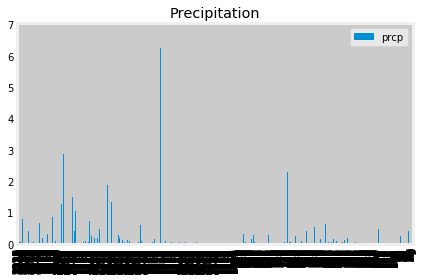

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
tMaxDate = session.query(func.max(Measurement.date) ).first()
maxDate =  datetime.strptime(tMaxDate[0], '%Y-%m-%d').date() 
dt1yrago =  (maxDate - pd.DateOffset(months=12)).date()

# Perform a query to retrieve the data and precipitation scores
#selCols = [Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs]
selCols = [Measurement.date, Measurement.prcp]
resultData =  session.query(*selCols).filter(Measurement.date >= dt1yrago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df_prcp = pd.DataFrame(resultData)
df_prcp.set_index('date')

# Sort the dataframe by date
df_prcp.sort_values(by='date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
df_prcp.iloc[::-1].plot.bar(title="Precipitation")
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [69]:
# Design a query to show how many stations are available in this dataset?
selCols2 = [Measurement.station,func.count(Measurement.station)]
resultData2 =  session.query(*selCols2).group_by(Measurement.station)
resultData2.count()

9

In [89]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
df_stn = pd.DataFrame(resultData2,columns=['station','count'])

# Sort the dataframe by date
df_ostn = df_stn.sort_values(by='count', ascending=False)
df_ostn

,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [94]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

selCols3 = [Measurement.station,func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
resultData3 =  session.query(*selCols3).filter(Measurement.station ==  df_ostn['station'].iloc[0])
df_stn_active =  pd.DataFrame(resultData3,columns=['station','lowtemp','maxtemp','avgtemp'])

df_stn_active

,station,lowtemp,maxtemp,avgtemp
0,USC00519281,54.0,85.0,71.663781


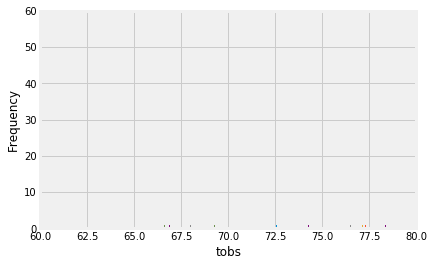

In [123]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
htmp_stn = session.query(Measurement.station,func.avg(Measurement.tobs)).group_by(Measurement.station)
df_htmp_stn = pd.DataFrame(htmp_stn,columns=['station','avgtob'])
df_hstn = df_stn.sort_values(by='count', ascending=False)

resultData4 =  session.query(Measurement.tobs).filter(Measurement.date >= dt1yrago).filter(Measurement.station == df_hstn['station'].iloc[0])
df_tobs = pd.DataFrame(resultData4, columns=['tob'])


plt.hist(df_tobs,density=1, bins=20) 
plt.axis([60, 80, 0, 60]) 
#axis([xmin,xmax,ymin,ymax])
plt.xlabel('tobs')
plt.ylabel('Frequency')
plt.show()

![precipitation](Images/station-histogram.png)

In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [18]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [19]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [20]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [21]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [22]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [23]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [24]:
# Plot the daily normals as an area plot with `stacked=False`
